# LASSO回归
最小绝对收缩和选择算子回归是一种线性回归的变体，它通过引入L1正则化项来实现特征选择和防止过拟合。
LASSO回归在普通最小二乘法(OLS)的基础上添加了一个L1惩罚项
min(1/(2n) * ||y - Xβ||²₂ + λ||β||₁)
    y是响应变量
    X是设计矩阵
    β是系数向量
    λ是调节参数，控制正则化的强度
    ||·||₁表示L1范数（系数的绝对值之和）
# 特点
1. 特征选择：LASSO能够将某些系数精确地压缩为零，从而实现自动特征选择
2. 稀疏性：特别适用于高维数据（特征数>>样本数）的情况
3. 偏差-方差权衡：通过调整λ，可以在偏差和方差之间取得平衡
# 与岭回归(Ridge)的区别
特性	            LASSO	              岭回归
正则化项	    L1范数(绝对值之和)	    L2范数(平方和)
系数压缩效果	可以精确到零	        接近但不等于零
适用场景	    特征选择	            防止过拟合
解的特性	    可能没有解析解	        总有解析解

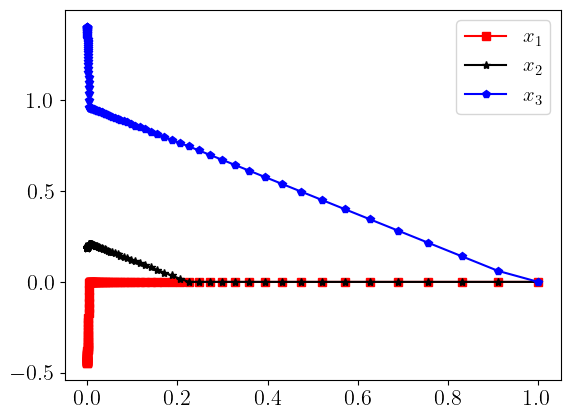

最优α= 0.0001
标准化数据的所有回归系数: [0.         0.01358604 0.76138391]
原始数据的截距项和回归系数为: [np.float64(-1.6602049109195391), array([0.        , 0.03742957, 0.16765569])]
拟合优度为: 0.9061154424386824


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LassoCV
from scipy.stats import zscore

plt.rc('font',size=16)
plt.rc('text', usetex=True)

a = np.loadtxt('Pdata12_3.txt')
n = a.shape[1]-1  #自变量的总个数
aa = zscore(a)  #数据标准化
x = aa[:,:n]
y = aa[:,n]  #提出自变量和因变量观测值矩阵
b = []  #用于存储回归系数的空列表
kk = np.logspace(-4,0,100)  #循环迭代不同的k值
for k in kk:
    md = Lasso(alpha=k).fit(x,y)
    b.append(md.coef_)
    
#绘图
st = ['s-r', '*-k', 'p-b']  #下面画图的控制字符串
for i in range(n):
    plt.plot(kk, np.array(b)[:,i], st[i])
plt.legend(['$x_1$','$x_2$','$x_3$'], fontsize=15)
plt.show()

mdcv = LassoCV(alphas=np.logspace(-4,0,100)).fit(x,y)
print('最优α=',mdcv.alpha_)
# print(mdcv.coef_)
# md0 = Lasso(mdcv.alpha_).fit(x,y)
md0 = Lasso(0.21).fit(x,y)
cs0 = md0.coef_  #提出标准化数据的回归系数
print('标准化数据的所有回归系数:', cs0)
#记算所有指标的均值和标准差
mu = np.mean(a,axis=0)
s = np.std(a,axis=0,ddof=1)
params = [mu[-1]-s[-1]*sum(cs0*mu[:-1]/s[:-1]),s[-1]*cs0/s[:-1]]
print('原始数据的截距项和回归系数为:',params)
print('拟合优度为:', md0.score(x,y))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1623.
Date:                Sun, 27 Jul 2025   Prob (F-statistic):           1.14e-06
Time:                        10:39:49   Log-Likelihood:                -28.919
No. Observations:                   9   AIC:                             67.84
Df Residuals:                       4   BIC:                             68.82
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1028.4134     58.305    -17.638      0.0

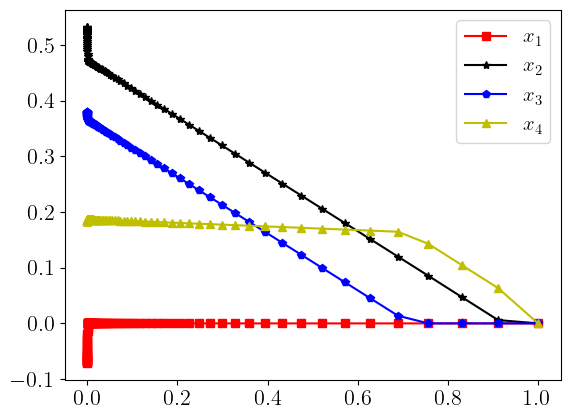

标准化数据的所有回归系数: [0.         0.4677164  0.36090457 0.18685297]
原始数据的截距项和回归系数为: [np.float64(-965.4805287798315), array([  0.        , 212.39279167,   1.54367804,   2.0612128 ])]
拟合优度为: 0.9991120248355678


In [41]:
#例二
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from scipy.stats import zscore

plt.rc('text', usetex=True)
a = np.loadtxt('Pdata12_6.txt')
n = a.shape[1]-1
x = a[:,:n]  #提取自变量观测值矩阵
X = sm.add_constant(x)
md = sm.OLS(a[:,n],X).fit()  #构建并拟合模型
print(md.summary())

aa = zscore(a)  #数据标准化
x = aa[:,:n]
y = aa[:,n]
b = []
kk = np.logspace(-4,0,100)  #循环迭代不同的k值
for k in kk:
    md = Lasso(alpha=k).fit(x,y)
    b.append(md.coef_)
#绘图
st = ['s-r', '*-k', 'p-b', '^-y']  #下面画图的控制字符串
for i in range(n):
    plt.plot(kk, np.array(b)[:,i], st[i])
plt.legend(['$x_1$','$x_2$','$x_3$','$x_4$'], fontsize=15)
plt.show()
md0 = Lasso(0.01).fit(x,y)
cs0 = md0.coef_
print('标准化数据的所有回归系数:',cs0)
#记算所有指标的均值和标准差
mu = np.mean(a,axis=0)
s = np.std(a,axis=0,ddof=1)
params = [mu[-1]-s[-1]*sum(cs0*mu[:-1]/s[:-1]),s[-1]*cs0/s[:-1]]
print('原始数据的截距项和回归系数为:',params)
print('拟合优度为:', md0.score(x,y))